In [1]:
pip install tqdm


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install PyPDF2


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pdfminer.six


Note: you may need to restart the kernel to use updated packages.


In [4]:
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import PyPDF2
import requests
from pdfminer.high_level import extract_text

## Project definition 

Objective:To predict the likelihood of BRICS nations adopting a cryptocurrency based on economic, political, social, and technological indicators.

Scope:Analysis of historical data, current policies, economic indicators, and public sentiment regarding cryptocurrencies.


## Data collection

What the Data Might Explain:


Economic Health and Stability: Strong or volatile economies may have different motivations for adopting cryptocurrency.

Regulatory Environment: The extent of regulations could either facilitate or hinder the adoption of cryptocurrencies.

Technological Readiness: A higher level of digital infrastructure and literacy may indicate a smoother transition to a digital currency.

Public Acceptance: Positive sentiment could be a driving force for adoption, while skepticism or lack of awareness could be major barriers.

Cryptocurrency Market Trends: Past and current trends in cryptocurrency usage within BRICS nations can offer insights into future adoption possibilities.

Trade Dynamics: A strong inclination for intra-BRICS trade with less reliance on traditional currencies might push towards a unified digital currency solution.

This data collection and analysis would provide a multifaceted view of the potential for cryptocurrency adoption in BRICS nations, considering economic, technological, social, and political dimensions.

### Economic indicators

Data Sources: International Monetary Fund (IMF), World Bank, national statistical offices.

Data Points: GDP growth, inflation rates, foreign exchange reserves, financial stability indicators.

Purpose: To assess the economic strength and stability of each country, which can influence their readiness or necessity to adopt a cryptocurrency.


#### GDP growth

In [6]:
# Assuming the file is on the Linux filesystem and not a mounted Windows drive
file_path = '/home/anamaria/code/nusero92/cryptocurency/Data/GDPOct2023.csv'
GDP=pd.read_csv(file_path, delimiter=';')
pd.set_option('display.max_columns', 10)
GDP.head(20)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,...,2025,2026,2027,2028,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",...,NaN,NaN,NaN,NaN,2021.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",...,NaN,NaN,NaN,NaN,2021.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",...,NaN,NaN,NaN,NaN,2021.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",...,NaN,NaN,NaN,NaN,2021.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",...,NaN,NaN,NaN,NaN,2021.0
5,512,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",...,NaN,NaN,NaN,NaN,2021.0
6,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",...,NaN,NaN,NaN,NaN,2021.0
7,512,AFG,NGDPPC,Afghanistan,"Gross domestic product per capita, current prices",...,NaN,NaN,NaN,NaN,2021.0
8,512,AFG,NGDPDPC,Afghanistan,"Gross domestic product per capita, current prices",...,NaN,NaN,NaN,NaN,2021.0
9,512,AFG,PPPPC,Afghanistan,"Gross domestic product per capita, current prices",...,NaN,NaN,NaN,NaN,2021.0


In [7]:
GDP["ISO"].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV', 'CYP',
       'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ',
       'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY',
       'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ',
       'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR',
       'KOR', 'UVK', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',
       'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI',
       'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MNG', 'MNE',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NZL', 'NIC',
       'NER', 'NGA',

In [8]:
GDP_BRICS = GDP[GDP["ISO"].isin(["BRA", "RUS", "ZAF", "IND", "CHN"])]
pd.set_option('display.max_columns', 10)
GDP_BRICS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 1055 to 6994
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               220 non-null    object 
 1   ISO                            220 non-null    object 
 2   WEO Subject Code               220 non-null    object 
 3   Country                        220 non-null    object 
 4   Subject Descriptor             220 non-null    object 
 5   Subject Notes                  220 non-null    object 
 6   Units                          220 non-null    object 
 7   Scale                          100 non-null    object 
 8   Country/Series-specific Notes  203 non-null    object 
 9   2002                           202 non-null    object 
 10  2003                           202 non-null    object 
 11  2004                           202 non-null    object 
 12  2005                           202 non-null   

In [9]:
GDP_BRICS.shape

(220, 37)

In [10]:
GDP_BRICS.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', 'Estimates Start After'],
      dtype='object')

##### Data cleaning

In [11]:
GDP_BRICS.isnull().sum()

WEO Country Code                   0
ISO                                0
WEO Subject Code                   0
Country                            0
Subject Descriptor                 0
Subject Notes                      0
Units                              0
Scale                            120
Country/Series-specific Notes     17
2002                              18
2003                              18
2004                              18
2005                              18
2006                              18
2007                              18
2008                              18
2009                              18
2010                              18
2011                              18
2012                              18
2013                              18
2014                              18
2015                              18
2016                              18
2017                              17
2018                              17
2019                              17
2

In [12]:
GDP_BRICS=GDP_BRICS.drop("Scale", axis=1)

In [13]:
subj_desc=GDP_BRICS["Subject Descriptor"].unique()
pd.set_option("display.max_colwidth", None)
print(subj_desc)
print(len(subj_desc))

['Gross domestic product, constant prices'
 'Gross domestic product, current prices'
 'Gross domestic product, deflator'
 'Gross domestic product per capita, constant prices'
 'Gross domestic product per capita, current prices'
 'Output gap in percent of potential GDP'
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total'
 'Implied PPP conversion rate' 'Total investment' 'Gross national savings'
 'Inflation, average consumer prices'
 'Inflation, end of period consumer prices'
 'Volume of imports of goods and services' 'Volume of Imports of goods'
 'Volume of exports of goods and services' 'Volume of exports of goods'
 'Unemployment rate' 'Employment' 'Population'
 'General government revenue' 'General government total expenditure'
 'General government net lending/borrowing'
 'General government structural balance'
 'General government primary net lending/borrowing'
 'General government net debt' 'General government gross debt'
 'Gross domestic product co

In [14]:
codes=GDP_BRICS["WEO Subject Code"].unique()
codes=list(codes)
print(codes)
len(codes)

['NGDP_R', 'NGDP_RPCH', 'NGDP', 'NGDPD', 'PPPGDP', 'NGDP_D', 'NGDPRPC', 'NGDPRPPPPC', 'NGDPPC', 'NGDPDPC', 'PPPPC', 'NGAP_NPGDP', 'PPPSH', 'PPPEX', 'NID_NGDP', 'NGSD_NGDP', 'PCPI', 'PCPIPCH', 'PCPIE', 'PCPIEPCH', 'TM_RPCH', 'TMG_RPCH', 'TX_RPCH', 'TXG_RPCH', 'LUR', 'LE', 'LP', 'GGR', 'GGR_NGDP', 'GGX', 'GGX_NGDP', 'GGXCNL', 'GGXCNL_NGDP', 'GGSB', 'GGSB_NPGDP', 'GGXONLB', 'GGXONLB_NGDP', 'GGXWDN', 'GGXWDN_NGDP', 'GGXWDG', 'GGXWDG_NGDP', 'NGDP_FY', 'BCA', 'BCA_NGDPD']


44

In [15]:
# Using loc method
filtered_GDP_BRICS = GDP_BRICS.loc[(GDP_BRICS["Subject Descriptor"] == "Gross domestic product, constant prices") & (GDP_BRICS["Units"] == "National currency")]

filtered_GDP_BRICS
gdp_national=filtered_GDP_BRICS[["Country", "Units","2002","2003", "2004","2005", "2006", '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',]]
gdp_national

,Country,Units,2002,2003,2004,...,2019,2020,2021,2022,2023
1055,Brazil,National currency,820.328,829.688,877.477,...,"1,204.17","1,164.71","1,222.82","1,258.29","1,297.09"
1583,China,National currency,"20,514.56","22,570.42","24,853.26",...,"89,451.02","91,456.54","99,184.26","102,148.67","107,266.44"
3387,India,National currency,"43,192.88","46,624.11","50,283.62",...,"145,346.40","136,871.20","149,258.40","160,064.30","170,199.53"
6291,Russia,National currency,"77,603.50","83,311.80","89,264.80",...,"131,595.00","128,102.90","135,295.00","132,494.80","135,475.26"
6951,South Africa,National currency,"3,010.47","3,099.25","3,240.41",...,"4,583.67","4,310.33","4,513.04","4,599.26","4,641.99"


##### Summary statistics

In [16]:
gdp_year= gdp_national.melt(id_vars=['Country', 'Units'], 
                                    var_name='Year', 
                                    value_name='GDP')

In [17]:
# Convert the 'GDP' column to a numeric type (float)
gdp_year['GDP'] = gdp_year['GDP'].replace(',', '', regex=True)
gdp_year['GDP'] = pd.to_numeric(gdp_year['GDP'], errors='coerce')
#print(gdp_year[gdp_year["Country"]=="South Africa"])

2023-12-26 18:29:00,728 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-26 18:29:00,731 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-26 18:29:00,734 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-26 18:29:00,735 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-26 18:29:00,738 - INFO - Using categorical units to plot a list of strings that are all parsable as 

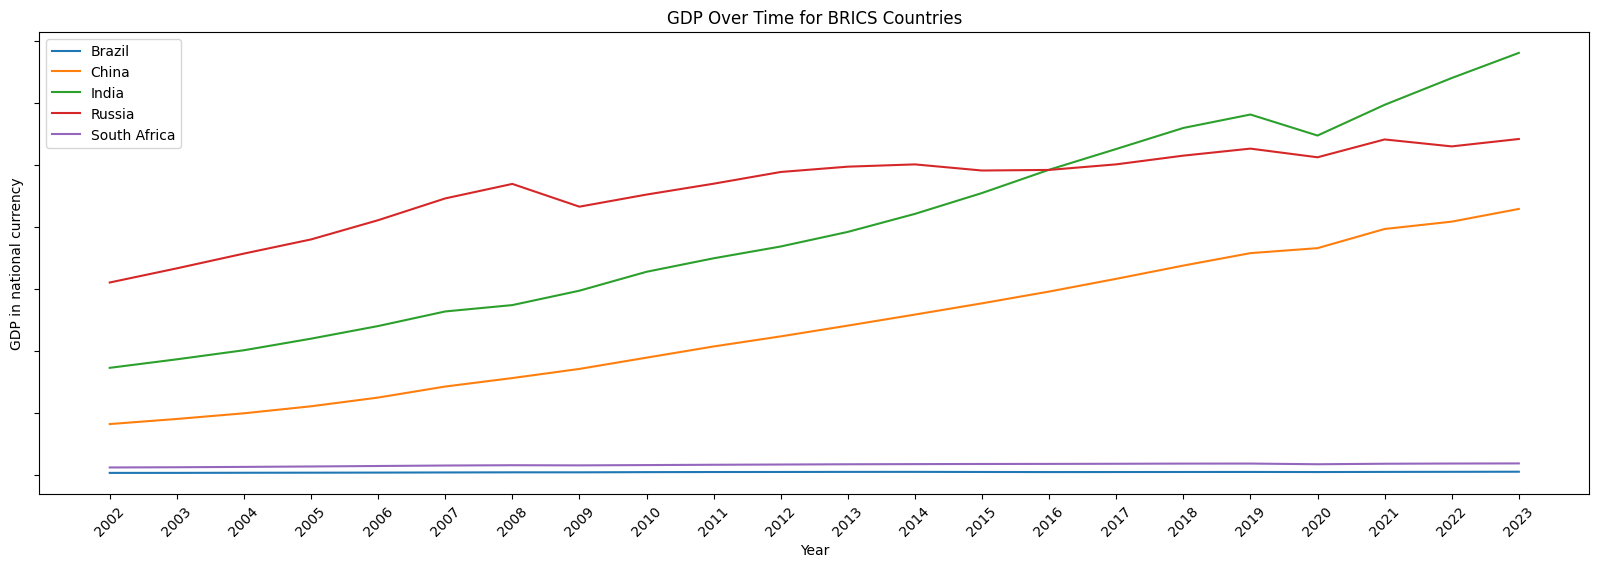

In [18]:
plt.figure(figsize=(20, 6))  # Set the size of the plot

# Plotting each country's GDP
for country in gdp_year['Country'].unique():
    country_data = gdp_year[gdp_year['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'])
plt.gca().yaxis.set_ticklabels([])
plt.xlabel('Year')
plt.ylabel('GDP in national currency')  # Assuming all rows have the same units
plt.title('GDP Over Time for BRICS Countries')
plt.legend(gdp_year['Country'].unique())
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [19]:
#  sorted by country and year for correct calculation
gdp_year = gdp_year.sort_values(by=['Country', 'Year'])

# Calculate GDP growth rate
gdp_year['gdp_growth'] = gdp_year.groupby('Country')['GDP'].pct_change() * 100

# to remove NaN values which appear for the first year of each country
gdp_year.dropna(subset=['gdp_growth'], inplace=True)

gdp_year


,Country,Units,Year,GDP,gdp_growth
5,Brazil,National currency,2003,829.688,1.141007
10,Brazil,National currency,2004,877.477,5.759876
15,Brazil,National currency,2005,905.575,3.202135
20,Brazil,National currency,2006,941.453,3.961903
25,Brazil,National currency,2007,998.598,6.069873
...,...,...,...,...,...
89,South Africa,National currency,2019,4583.670,0.260074
94,South Africa,National currency,2020,4310.330,-5.963344
99,South Africa,National currency,2021,4513.040,4.702888
104,South Africa,National currency,2022,4599.260,1.910464


2023-12-26 18:29:01,096 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-26 18:29:01,099 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-26 18:29:01,101 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-26 18:29:01,103 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-26 18:29:01,105 - INFO - Using categorical units to plot a list of strings that are all parsable as 

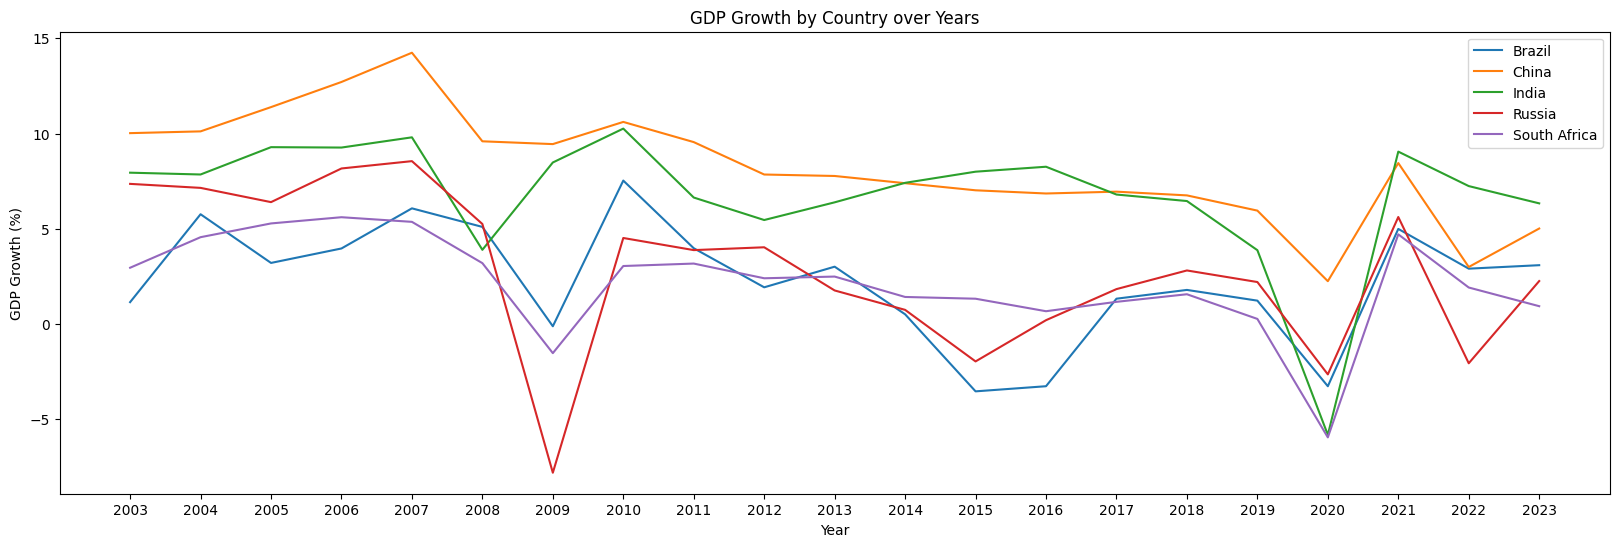

In [20]:
plt.figure(figsize=(20, 6))  # Set the size of the plot
unique_countries = gdp_year['Country'].unique()
for country in unique_countries:
    country_data = gdp_year[gdp_year['Country'] == country]
    plt.plot(country_data['Year'], country_data['gdp_growth'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth by Country over Years')
plt.legend()
plt.show()

#### Inflation rates

Inflation measured by consumer price index (CPI) is defined as the change in the prices of a basket of goods and services that are typically purchased by specific groups of households. Inflation is measured in terms of the annual growth rate and in index, 2015 base year with a breakdown for food, energy and total excluding food and energy. Inflation measures the erosion of living standards. A consumer price index is estimated as a series of summary measures of the period-to-period proportional change in the prices of a fixed set of consumer goods and services of constant quantity and characteristics, acquired, used or paid for by the reference population. Each summary measure is constructed as a weighted average of a large number of elementary aggregate indices. Each of the elementary aggregate indices is estimated using a sample of prices for a defined set of goods and services obtained in, or by residents of, a specific region from a given set of outlets or other sources of consumption goods and services.

https://data.oecd.org/price/inflation-cpi.htm

In [21]:
file_path2 = '/home/anamaria/code/nusero92/cryptocurency/Data/inflation_rates.csv'
inflation=pd.read_csv(file_path2)

inflation=inflation.drop("Flag Codes", axis=1)
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   74 non-null     object 
 1   INDICATOR  74 non-null     object 
 2   SUBJECT    74 non-null     object 
 3   MEASURE    74 non-null     object 
 4   FREQUENCY  74 non-null     object 
 5   TIME       74 non-null     int64  
 6   Value      74 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 4.2+ KB


In [22]:
inflation.head()


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,BRA,CPI,FOOD,AGRWTH,A,2018,0.870314
1,BRA,CPI,TOT,AGRWTH,A,2018,3.664850
2,BRA,CPI,TOT,AGRWTH,A,2019,3.732976
3,BRA,CPI,TOT,AGRWTH,A,2020,3.211768
4,BRA,CPI,TOT,AGRWTH,A,2021,8.301660


In [23]:
inflation["TIME"]=inflation["TIME"].astype(int)
#inflation["TIME"]= inflation["TIME"].apply(lambda x: datetime(x,1,1))
inflation

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,BRA,CPI,FOOD,AGRWTH,A,2018,0.870314
1,BRA,CPI,TOT,AGRWTH,A,2018,3.664850
2,BRA,CPI,TOT,AGRWTH,A,2019,3.732976
3,BRA,CPI,TOT,AGRWTH,A,2020,3.211768
4,BRA,CPI,TOT,AGRWTH,A,2021,8.301660
...,...,...,...,...,...,...,...
69,RUS,CPI,TOT_FOODENRG,AGRWTH,A,2018,2.971667
70,RUS,CPI,TOT_FOODENRG,AGRWTH,A,2019,3.820000
71,RUS,CPI,TOT_FOODENRG,AGRWTH,A,2020,3.010833
72,RUS,CPI,TOT_FOODENRG,AGRWTH,A,2021,5.456666


In [24]:
inflation_2021 = inflation[inflation['TIME'] == "2021"]
inflation_2021

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value


##### Trend analysis

0    2018
1    2018
2    2019
3    2020
4    2021
Name: TIME, dtype: object


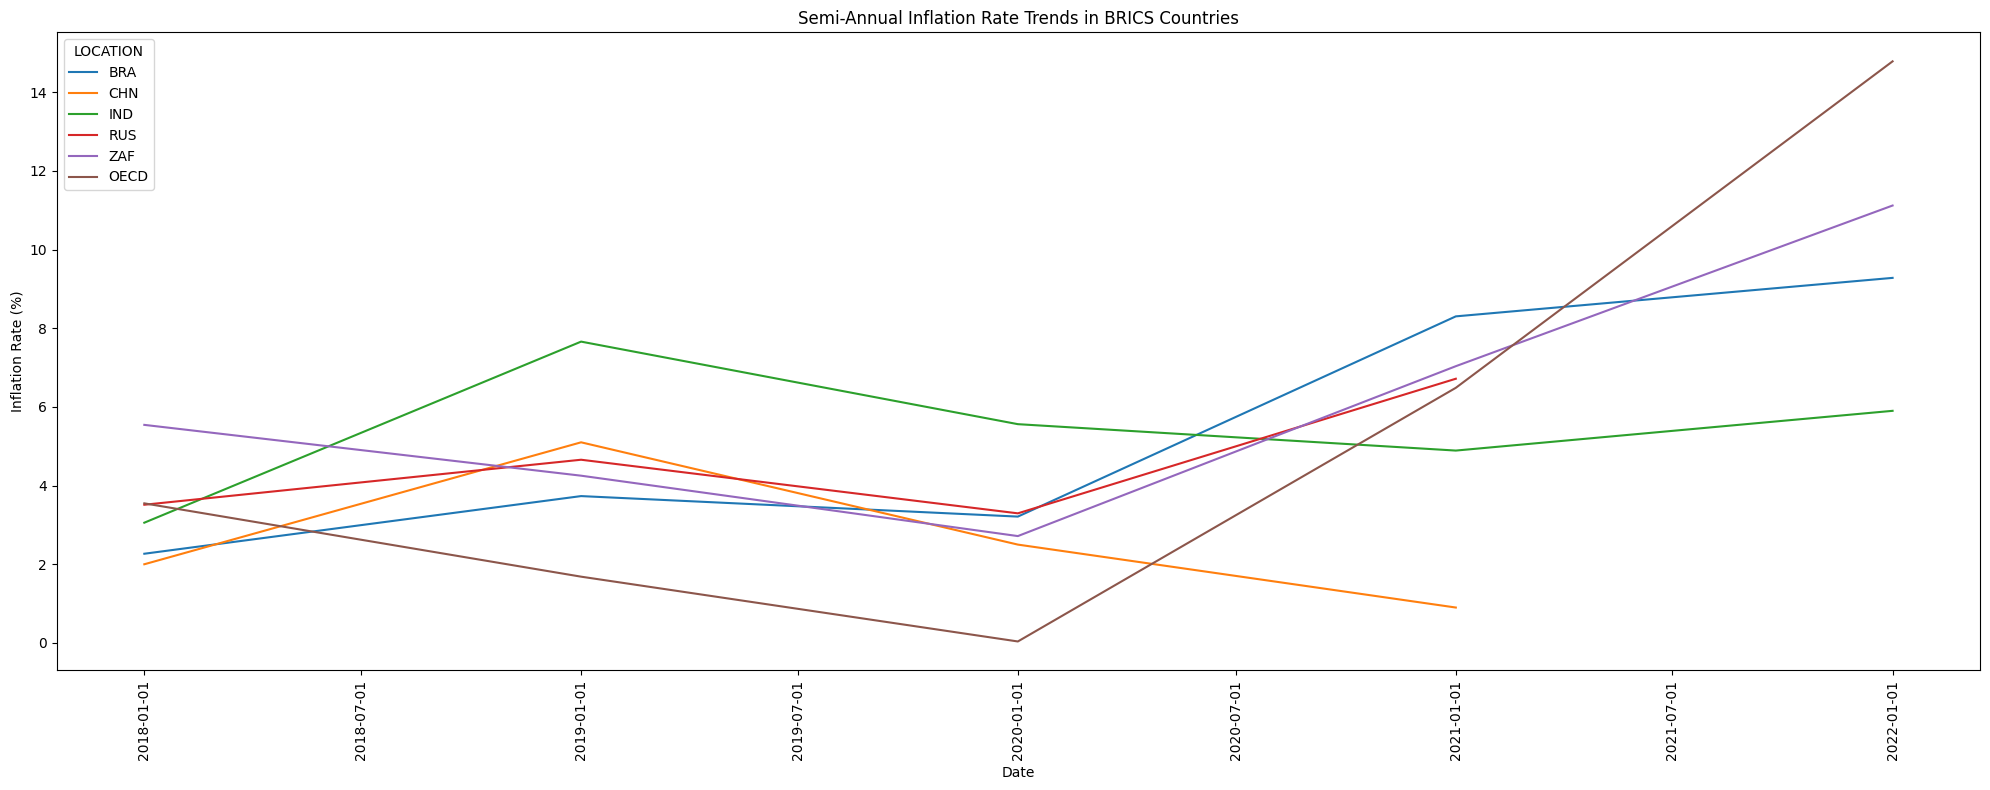

In [25]:
# Ensure the 'TIME' column is a string before performing string operations
inflation['TIME'] = inflation['TIME'].astype(str)

# Check if the year part is correct (e.g., '2023-01' or '2023-07')
print(inflation['TIME'].head())

# Assuming the format is correct (e.g., '2023-01' for first half and '2023-07' for second half)
# Replace '01' with '06-30' and '07' with '12-31'
inflation['TIME'] = pd.to_datetime(inflation['TIME'].str.replace('-01', '-06-30').str.replace('-07', '-12-31'))

# Now you can plot the data
plt.figure(figsize=(20, 8))
ax = sns.lineplot(data=inflation, x='TIME', y='Value', hue='LOCATION', ci=None)

# Set the date format on the x-axis
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=90)
plt.title('Semi-Annual Inflation Rate Trends in BRICS Countries')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


#### Comparative analysis

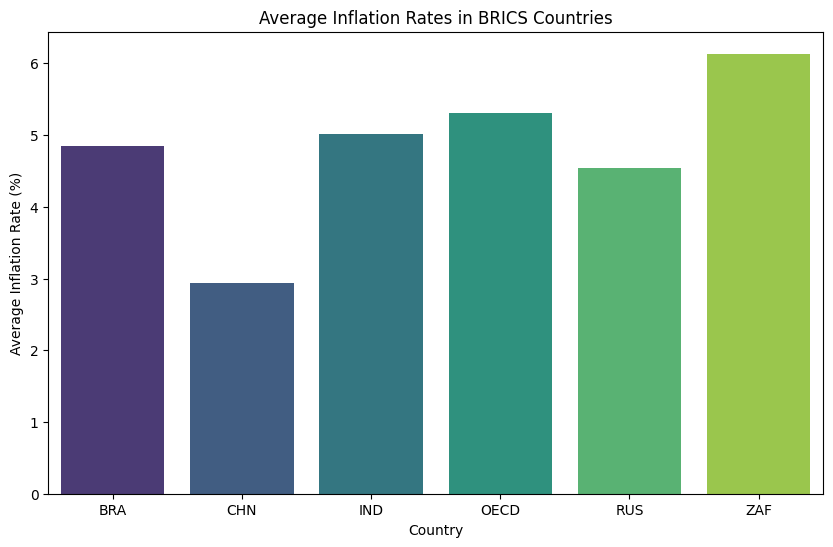

In [26]:
# Calculate average inflation rates for each country
average_inflation = inflation.groupby('LOCATION')['Value'].mean().reset_index()

# Plotting the average inflation rates
plt.figure(figsize=(10, 6))
sns.barplot(data=average_inflation, x='LOCATION', y='Value', palette='viridis')
plt.title('Average Inflation Rates in BRICS Countries')
plt.xlabel('Country')
plt.ylabel('Average Inflation Rate (%)')
plt.show()


#### Subject specific analysis

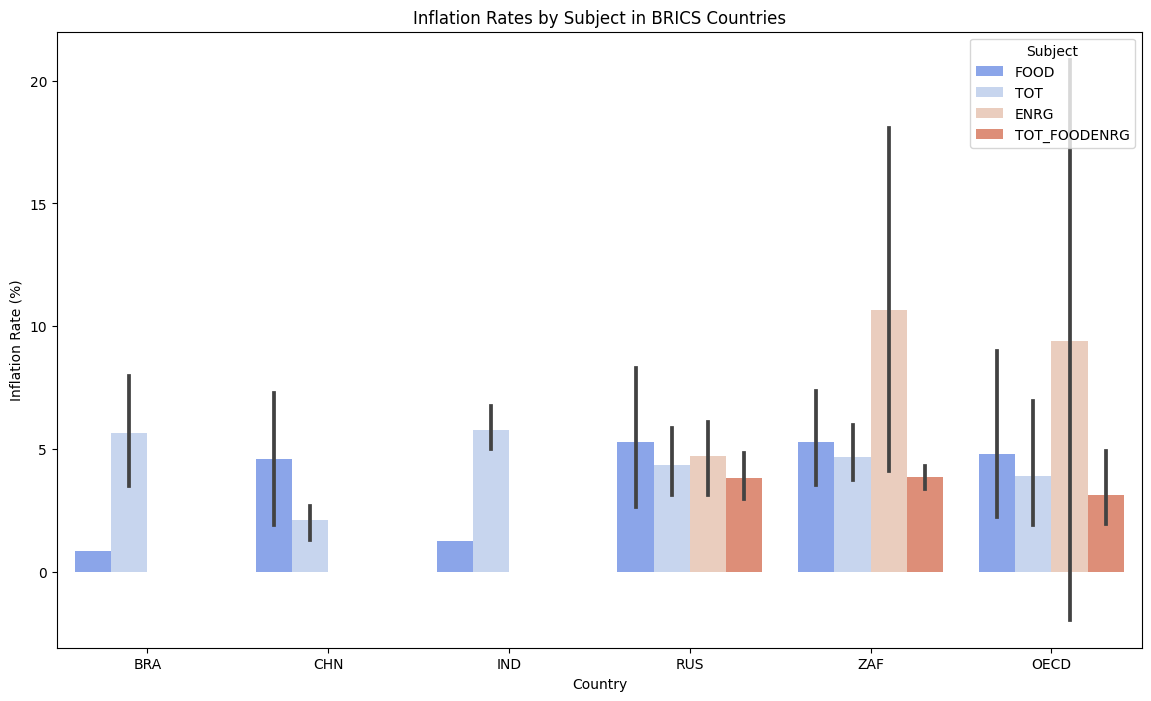

In [27]:
# Plot inflation rates by subject for each country
plt.figure(figsize=(14, 8))
sns.barplot(data=inflation, x='LOCATION', y='Value', hue='SUBJECT', palette='coolwarm')
plt.title('Inflation Rates by Subject in BRICS Countries')
plt.xlabel('Country')
plt.ylabel('Inflation Rate (%)')
plt.legend(title='Subject')
plt.show()


#### Correlation analysis

##### Adoption rate crypto

In [28]:
file_index="/home/anamaria/code/nusero92/cryptocurency/Data/Global_Crypto_Adoption_Index.xlsx"
adoption_index=pd.read_excel(file_index)
adoption_index["TIME"]=int(2021)
adoption_index

,Country,Index Score,Overall Index Ranking,On-chain Value Received,On-chain Retail Value Received,P2P Exchange Trade Volume,TIME
0,Russian Federation,0.14,18,8,6,122,2021
1,China,0.16,13,1,1,155,2021
2,Brazil,0.16,14,5,7,113,2021
3,South Africa,0.14,16,18,16,62,2021
4,India,0.37,2,2,3,72,2021


In [29]:
# Map country names to their corresponding codes in the inflation data
country_to_location = {
    'Russian Federation': 'RUS',
    'China': 'CHN',
    'Brazil': 'BRA',
    'South Africa': 'ZAF',
    'India': 'IND'
}

# Map the country names to LOCATION codes in the cryptocurrency data
adoption_index['LOCATION'] = adoption_index['Country'].map(country_to_location)

# Average the inflation rates per country for 2021
avg_inflation_2021 = inflation_2021.groupby('LOCATION')['Value'].mean().reset_index()

# Merge the 2021 average inflation data with the cryptocurrency data on the LOCATION column
merged_data = pd.merge(adoption_index, avg_inflation_2021, on='LOCATION', how='left')

# Select the cryptocurrency metrics and the inflation rate ('Value')
metrics = ['Index Score', 'On-chain Value Received', 'On-chain Retail Value Received', 'P2P Exchange Trade Volume', 'Value']

# Calculate the correlation matrix for the selected metrics
correlation_matrix = merged_data[metrics].corr()

# Output the correlation matrix
correlation_matrix



,Index Score,On-chain Value Received,On-chain Retail Value Received,P2P Exchange Trade Volume,Value
Index Score,1.000000,-0.464624,-0.408286,-0.423623,NaN
On-chain Value Received,-0.464624,1.000000,0.973757,-0.583813,NaN
On-chain Retail Value Received,-0.408286,0.973757,1.000000,-0.651746,NaN
P2P Exchange Trade Volume,-0.423623,-0.583813,-0.651746,1.000000,NaN
Value,NaN,NaN,NaN,NaN,NaN


#### Foreign exchange reserves

#### Financial stability indicatiors

file:///C:/Users/anama/Downloads/FSI%20Compilation%20Guide%202019%20(English).pdf
https://www.cbr.ru/Collection/Collection/File/43513/en_2q_3q_2022.pdf

In [30]:
file_fsi="/home/anamaria/code/nusero92/cryptocurency/Data/GFSR_FSI BRICS.csv"
fsi=pd.read_csv(file_fsi, sep=";")
fsi.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
fsi_BRICS = fsi[fsi["Country"].isin(["China, P.R.: Hong Kong","China, P.R.: Mainland","China, P.R.: Macao", "India", "Russian Federation", "South Africa", "Brazil"])]
fsi_BRICS=fsi_BRICS.reset_index(drop=True)
fsi_BRICS

,Country,2010,2011,2012,2013,...,2019,2020,2021,2022,Period
0,"China, P.R.: Hong Kong",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"7,71",2023Q3
1,Russian Federation,"10,84","10,04","9,96","10,36",...,"9,16","6,98","6,67","6,69",2023M6
2,"China, P.R.: Mainland",NaN,NaN,NaN,NaN,...,"7,57","7,54","7,75","7,48",2022Q3
3,India,"6,18","5,87","6,13","6,07",...,"8,03","7,81","7,83","7,76",2023Q2
4,"China, P.R.: Macao","3,02","2,66","2,66","2,36",...,"3,1","3,08","2,84","3,51",2023Q3
5,South Africa,"6,78","6,84","7,44","7,56",...,"8,01","7,61","8,09","6,3",2022Q3
6,Brazil,"10,3","10,08","10,15","10,15",...,"9,55","8,66","8,77","8,76",2023Q1


### Government Policies and Regulations

Data Sources: Government websites, policy documents, official statements.

Data Points: Existing regulations on cryptocurrencies, digital economy policies, central bank statements.

Purpose: To understand the legal and regulatory environment, which directly impacts the feasibility of cryptocurrency adoption.

#### Regulations on cryptocurrency regulations

##### GLOBAL

https://www.pwc.com/gx/en/new-ventures/cryptocurrency-assets/pwc-global-crypto-regulation-report-2023.pdf
file:///C:/Users/anama/Downloads/PPEA2023048.pdf
file:///C:/Users/anama/Downloads/Cryptocurrency_regulation_in_the_BriCs_Countries_a.pdf

In [31]:
reg_pwc_global="/home/anamaria/code/nusero92/cryptocurency/Data/pwc-global-crypto-regulation-report-2023.pdf"
cbdc_initial_considerations="/home/anamaria/code/nusero92/cryptocurency/Data/PPEA2023048.pdf"
reg_crypto_brics="/home/anamaria/code/nusero92/cryptocurency/Data/Cryptocurrency_regulation_in_the_BriCs_Countries_a.pdf"

In [32]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text() if page.extract_text() else ''
        return text

In [33]:
pdf_reg_pwc_global = extract_text_from_pdf(reg_pwc_global)

In [34]:
pdf_cbdc_initial_considerations=extract_text_from_pdf(cbdc_initial_considerations)

In [35]:
pdf_reg_crypto_brics=extract_text_from_pdf(reg_crypto_brics)

##### INDIA

india:https://www.globallegalinsights.com/practice-areas/blockchain-laws-and-regulations/india
https://www.livemint.com/money/personal-finance/a-timeline-of-crypto-regulations-from-illegal-tender-to-g20-leaders-green-signal-11697308879694.html


In [36]:
# List of URLs of the PDFs for India
pdf_urls_india = [
    'https://www.cert-in.org.in/PDF/CERT-In_Directions_70B_28.04.2022.pdf',
    'https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/ENABLING79D8EBD31FED47A0BE21158C337123BF.PDF',
    'https://main.sci.gov.in/supremecourt/2018/19230/19230_2018_4_1501_21151_Judgement_04-Mar-2020.pdf'
    # Add more URLs here
]

In [37]:
# Directory to save downloaded PDFs
download_dir_india = 'downloaded_pdfs_india'

# Ensure the download directory exists
os.makedirs(download_dir_india, exist_ok=True)

In [38]:
def download_pdf(url, filename):
    response = requests.get(url)
    response.raise_for_status()  # Ensure the download was successful

    with open(filename, 'wb') as f:
        f.write(response.content)


In [39]:
def extract_text_from_pdf_with_pdfminer(pdf_path):
    text = extract_text(pdf_path)
    return text

In [40]:
# Process each URL
from tqdm.notebook import tqdm

# Assuming pdf_urls_india is a list of URLs and download_dir_india is defined
for url in tqdm(pdf_urls_india, desc="Downloading and Extracting PDFs"):
    try:
        filename = os.path.join(download_dir_india, url.split('/')[-1])
        logging.info(f"Downloading PDF from {url}")
        download_pdf(url, filename)
        
        logging.info(f"Extracting text from {filename}")
        text_india = extract_text_from_pdf_with_pdfminer(filename)
        
        logging.info(f"Text extraction complete for {filename}")
        print(text_india[:500])  # Print first 500 characters for brevity
    except Exception as e:
        logging.error(f"Error processing {filename}: {e}")


2023-12-26 18:29:10,268 - INFO - Downloading PDF from https://www.cert-in.org.in/PDF/CERT-In_Directions_70B_28.04.2022.pdf
2023-12-26 18:29:12,071 - INFO - Extracting text from downloaded_pdfs_india/CERT-In_Directions_70B_28.04.2022.pdf
2023-12-26 18:29:12,596 - INFO - Text extraction complete for downloaded_pdfs_india/CERT-In_Directions_70B_28.04.2022.pdf
2023-12-26 18:29:12,598 - INFO - Downloading PDF from https://rbidocs.rbi.org.in/rdocs/PublicationReport/Pdfs/ENABLING79D8EBD31FED47A0BE21158C337123BF.PDF


No. 20(3)/2022-CERT-In 
Government of India 
Ministry of Electronics and Information Technology (MeitY) 
Indian Computer Emergency Response Team (CERT-In) 

Electronics Niketan, 
6 CGO Complex, 
 New Delhi-110003 

Dated: 28 April, 2022 

Subject: Directions under sub-section (6) of section 70B of the Information 
Technology  Act,  2000  relating  to  information  security  practices, 
procedure, prevention, response and reporting of cyber incidents 
for Safe & Trusted Internet.  

Whereas, the 


2023-12-26 18:29:17,585 - INFO - Extracting text from downloaded_pdfs_india/ENABLING79D8EBD31FED47A0BE21158C337123BF.PDF
2023-12-26 18:29:18,532 - INFO - Text extraction complete for downloaded_pdfs_india/ENABLING79D8EBD31FED47A0BE21158C337123BF.PDF
2023-12-26 18:29:18,534 - INFO - Downloading PDF from https://main.sci.gov.in/supremecourt/2018/19230/19230_2018_4_1501_21151_Judgement_04-Mar-2020.pdf


                                        Department of Banking Regulation 

   Banking Policy Division 

 Enabling Framework for Regulatory Sandbox 

Contents 

1.  Background 

2.  The Regulatory Sandbox: Principles and Objectives  

3.  Regulatory Sandbox: Benefits  

4.  Regulatory Sandbox: Risks and Limitations 

5.  Regulatory Sandbox: Eligibility Criteria  

6.  Design Aspects of the Regulatory Sandbox 

7.  The Regulatory Sandbox Process and its Stages 

8.  Statutory and Legal Issues     


2023-12-26 18:30:54,972 - INFO - Extracting text from downloaded_pdfs_india/19230_2018_4_1501_21151_Judgement_04-Mar-2020.pdf
2023-12-26 18:31:25,284 - INFO - Text extraction complete for downloaded_pdfs_india/19230_2018_4_1501_21151_Judgement_04-Mar-2020.pdf


REPORTABLE 

IN THE SUPREME COURT OF INDIA 
CIVIL ORIGINAL JURISDICTION 

Writ Petition (Civil) No.528 of 2018 

INTERNET AND MOBILE ASSOCIATION  
OF INDIA  

…. Petitioner   

Versus 

RESERVE BANK OF INDIA 

... Respondent 

WITH 

Writ Petition (Civil) No.373 of 2018 

J U D G M E N T 

V. Ramasubramanian, J. 

1. THE STORY LINE:  

1.1.  Reserve  Bank  of  India  (hereinafter,  “RBI”)  issued  a 

“Statement  on  Developmental  and  Regulatory  Policies”  on  April 

5, 2018, paragraph 13 of


##### RUSSIA

russia: https://www.cbr.ru/Content/Document/File/132242/Consultation_Paper_20012022_eng.pdf

https://www.investopedia.com/terms/c/cryptoruble.asp

In [41]:
pdf_urls_russia = [
    'https://www.cbr.ru/Content/Document/File/132242/Consultation_Paper_20012022_eng.pdf',
    # Add more URLs here
]

In [42]:
# Directory to save downloaded PDFs
download_dir_russia = 'downloaded_pdfs_russia'

# Ensure the download directory exists
os.makedirs(download_dir_russia, exist_ok=True)

In [43]:
for url in tqdm(pdf_urls_russia, desc="Downloading and Extracting PDFs"):
    try:
        filename = os.path.join(download_dir_russia, url.split('/')[-1])
        logging.info(f"Downloading PDF from {url}")
        download_pdf(url, filename)
        
        logging.info(f"Extracting text from {filename}")
        text_russia = extract_text_from_pdf_with_pdfminer(filename)
        
        logging.info(f"Text extraction complete for {filename}")
        print(text_india[:500])  # Print first 500 characters for brevity
    except Exception as e:
        logging.error(f"Error processing {filename}: {e}")


2023-12-26 18:31:25,346 - INFO - Downloading PDF from https://www.cbr.ru/Content/Document/File/132242/Consultation_Paper_20012022_eng.pdf
2023-12-26 18:31:26,432 - INFO - Extracting text from downloaded_pdfs_russia/Consultation_Paper_20012022_eng.pdf
2023-12-26 18:31:32,556 - INFO - Text extraction complete for downloaded_pdfs_russia/Consultation_Paper_20012022_eng.pdf


REPORTABLE 

IN THE SUPREME COURT OF INDIA 
CIVIL ORIGINAL JURISDICTION 

Writ Petition (Civil) No.528 of 2018 

INTERNET AND MOBILE ASSOCIATION  
OF INDIA  

…. Petitioner   

Versus 

RESERVE BANK OF INDIA 

... Respondent 

WITH 

Writ Petition (Civil) No.373 of 2018 

J U D G M E N T 

V. Ramasubramanian, J. 

1. THE STORY LINE:  

1.1.  Reserve  Bank  of  India  (hereinafter,  “RBI”)  issued  a 

“Statement  on  Developmental  and  Regulatory  Policies”  on  April 

5, 2018, paragraph 13 of


##### SOUTH AFRICA

south africa : https://www.bakermckenzie.com/-/media/files/insight/publications/2019/02/report_blockchainandcryptocurrencyreg_feb2019.pdf
https://www.pulp.up.ac.za/edocman/journals/2021_PSLR/zakariya%20Adam%202.pdf

In [44]:
# URLs
pdf_urls_sa = [
    'https://www.pulp.up.ac.za/edocman/journals/2021_PSLR/zakariya%20Adam%202.pdf'
    # Add more URLs here
]

# Directory to save downloaded PDFs
download_dir_sa = 'downloaded_pdfs_sa'

# Ensure the download directory exists
os.makedirs(download_dir_sa, exist_ok=True)

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


In [45]:
# Directory where the downloaded PDFs are stored
download_dir_sa = 'downloaded_pdfs_sa'

# Function to extract text from a PDF using PDFMiner
def extract_text_from_pdf_with_pdfminer(pdf_path):
    try:
        text = extract_text(pdf_path)
        return text
    except Exception as e:
        logging.error(f"Error extracting text from {pdf_path}: {e}")
        return None

# Get a list of PDF filenames from the download directory
pdf_filenames = [f for f in os.listdir(download_dir_sa) if f.endswith('.pdf')]

# Process each PDF file
for filename in tqdm(pdf_filenames, desc="Extracting Text from PDFs"):
    full_path = os.path.join(download_dir_sa, filename)
    logging.info(f"Extracting text from {full_path}")
    text_sa = extract_text_from_pdf_with_pdfminer(full_path)
    
    if text_sa:
        logging.info(f"Text extraction complete for {filename}")
        print(text_sa[:500])  # Print first 500 characters for brevity
    else:
        logging.info(f"No text extracted from {filename}")

Extracting Text from PDFs:   0%|          | 0/2 [00:00<?, ?it/s]

2023-12-26 18:31:32,632 - INFO - Extracting text from downloaded_pdfs_sa/zakariya%20Adam%202.pdf
2023-12-26 18:31:33,791 - INFO - Text extraction complete for zakariya%20Adam%202.pdf
2023-12-26 18:31:33,794 - INFO - Extracting text from downloaded_pdfs_sa/report_blockchainandcryptocurrencyreg_feb2019.pdf


AN OVERVIEW OF THE REGULATION OF 
CRYPTOCURRENCY IN SOUTH AFRICA
https://doi.org/10.29053/pslr.v15i1.3676

by Zakariya Adam*

Abstract

The increasing popularity of cryptocurrencies has raised many questions
with regard to their regulation. Issues such as taxation and its role in
criminal  activities  are  of  central  importance  to  the  way  in  which
cryptocurrency will continue to develop and occupy space in society. In
this  paper,  such  regulatory  aspects  are  explored,  and  South  Af


2023-12-26 18:31:35,890 - INFO - Text extraction complete for report_blockchainandcryptocurrencyreg_feb2019.pdf


Blockchain and Cryptocurrency in Africa

A comparative summary of the reception and regulation of Blockchain  
and Cryptocurrency in Africa

2018 Baker McKenzie, Johannesburg

IMPORTANT DISCLAIMER:  
The material in this report is of the nature of general comment only. It is not offered as legal 
advice on any specific issue or matter and should not be taken as such. Readers should refrain 
from acting on the basis of any discussion contained in this report without obtaining specific 
legal adv


#### CHINA

china: https://www.tribunajuridica.eu/arhiva/An12v2/2.%20Xu,%20Jin.pdf
https://markets.businessinsider.com/news/currencies/china-crypto-crackdown-timeline-regulatory-bitcoin-ether-solana-dogecoin-bans-2021-9

In [46]:
# Assuming download_pdf and extract_text_from_pdf_with_pdfminer functions are already defined

# URLs for China PDFs
pdf_urls_china = [
    'https://www.tribunajuridica.eu/arhiva/An12v2/2.%20Xu,%20Jin.pdf'
    # Add more URLs here
]

# Directory to save downloaded PDFs for China
download_dir_china = 'downloaded_pdfs_china'

# Ensure the download directory exists
os.makedirs(download_dir_china, exist_ok=True)

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Loop for downloading and extracting text from PDFs
for url in tqdm(pdf_urls_china, desc="Downloading and Extracting PDFs"):
    try:
        filename = os.path.join(download_dir_china, url.split('/')[-1])
        logging.info(f"Downloading PDF from {url}")
        if download_pdf(url, filename):
            logging.info(f"Extracting text from {filename}")
            text_china = extract_text_from_pdf_with_pdfminer(filename)
            
            if text_china:
                logging.info(f"Text extraction complete for {filename}")
                print(text_china[:500])  # Print first 500 characters for brevity
            else:
                logging.info(f"No text extracted from {filename}")
    except Exception as e:
        logging.error(f"Error processing {filename}: {e}")


2023-12-26 18:31:35,941 - INFO - Downloading PDF from https://www.tribunajuridica.eu/arhiva/An12v2/2.%20Xu,%20Jin.pdf


##### BRAZIL

brazil:https://cgmlaw.com.br/wp-content/uploads/2021/12/GLI-Blockchain-_-Cryptocurrency-Regulation_2020_Brazil-1.pdf
https://www.globallegalinsights.com/practice-areas/blockchain-laws-and-regulations/brazil
https://abcripto.com.br/wp-content/uploads/2023/10/crypto-in-brazil-2023-full-report.pdf
https://chambers.com/legal-trends/virtual-currency-regulation-in-brazil

In [51]:
# Assuming download_pdf and extract_text_from_pdf_with_pdfminer functions are already defined

# URLs for China PDFs
pdf_urls_brazil = [
    'https://www.bcb.gov.br/pom/spb/ing/Communique_25306.pdf',
    'https://www.bcb.gov.br/pom/spb/ing/Communique_31379.pdf',
    'https://www.bcb.gov.br/content/config/Documents/Regulatory_Sandbox_Regulation_CMN_Resolution_No_4865_2020.pdf',
    'https://abcripto.com.br/wp-content/uploads/2023/10/crypto-in-brazil-2023-full-report.pdf',
    'https://www.gov.br/mcti/pt-br/centrais-de-conteudo/comunicados-mcti/estrategia-digital-brasileira/digitalstrategy.pdf'
    # Add more URLs here
]

# Directory to save downloaded PDFs for China
download_dir_brazil = 'downloaded_pdfs_brazil'

# Ensure the download directory exists
os.makedirs(download_dir_brazil, exist_ok=True)

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Loop for downloading and extracting text from PDFs
for url in tqdm(pdf_urls_brazil, desc="Downloading and Extracting PDFs"):
    try:
        filename = os.path.join(download_dir_brazil, url.split('/')[-1])
        logging.info(f"Downloading PDF from {url}")
        if download_pdf(url, filename):
            logging.info(f"Extracting text from {filename}")
            text_brazil = extract_text_from_pdf_with_pdfminer(filename)
            
            if text_brazil:
                logging.info(f"Text extraction complete for {filename}")
                print(text_brazil[:500])  # Print first 500 characters for brevity
            else:
                logging.info(f"No text extracted from {filename}")
    except Exception as e:
        logging.error(f"Error processing {filename}: {e}")

2023-12-26 19:03:25,857 - INFO - Downloading PDF from https://www.bcb.gov.br/pom/spb/ing/Communique_25306.pdf
2023-12-26 19:03:26,117 - INFO - Downloading PDF from https://www.bcb.gov.br/pom/spb/ing/Communique_31379.pdf
2023-12-26 19:03:26,309 - INFO - Downloading PDF from https://www.bcb.gov.br/content/config/Documents/Regulatory_Sandbox_Regulation_CMN_Resolution_No_4865_2020.pdf
2023-12-26 19:03:26,612 - INFO - Downloading PDF from https://abcripto.com.br/wp-content/uploads/2023/10/crypto-in-brazil-2023-full-report.pdf
2023-12-26 19:03:29,658 - INFO - Downloading PDF from https://www.gov.br/mcti/pt-br/centrais-de-conteudo/comunicados-mcti/estrategia-digital-brasileira/digitalstrategy.pdf


In [48]:
# Get a list of PDF filenames from the download directory
pdf_filenames = [f for f in os.listdir(download_dir_brazil) if f.endswith('Cryptocurrency-Regulation_2020_Brazil-1.pdf')]

# Process each PDF file
for filename in tqdm(pdf_filenames, desc="Extracting Text from PDFs"):
    full_path = os.path.join(download_dir_brazil, filename)
    logging.info(f"Extracting text from {full_path}")
    text_brazil_20 = extract_text_from_pdf_with_pdfminer(full_path)
    
    if text_brazil_20:
        logging.info(f"Text extraction complete for {filename}")
        print(text_brazil_20[:500])  # Print first 500 characters for brevity
    else:
        logging.info(f"No text extracted from {filename}")

Extracting Text from PDFs:   0%|          | 0/1 [00:00<?, ?it/s]

2023-12-26 18:31:54,132 - INFO - Extracting text from downloaded_pdfs_brazil/GLI-Blockchain-_-Cryptocurrency-Regulation_2020_Brazil-1.pdf
2023-12-26 18:31:54,885 - INFO - Text extraction complete for GLI-Blockchain-_-Cryptocurrency-Regulation_2020_Brazil-1.pdf


Preface

Foreword

Glossary

Industry

CONTENTS  

Josias N. Dewey, Holland & Knight LLP 

Aaron Wright, Enterprise Ethereum Alliance 

The Editor shares key concepts and definitions of blockchain 

Promoting innovation through education: The blockchain industry, 
law enforcement and regulators work towards a common goal 
Jason Weinstein & Alan Cohn, The Blockchain Alliance

The loan market, blockchain, and smart contracts: The potential 
for transformative change 
Bridget Marsh, LSTA & Josias 


#### Digital economy policies

https://www.oecd-ilibrary.org/sites/bb167041-en/1/3/2/index.html?itemId=/content/publication/bb167041-en&_csp_=509e10cb8ea8559b6f9cc53015e8814d&itemIGO=oecd&itemContentType=book#section-16

brazil: https://www.itu.int/dms_pub/itu-d/opb/pref/D-PREF-THEM.31-2023-PDF-E.pdf
https://www.gov.br/mcti/pt-br/centrais-de-conteudo/comunicados-mcti/estrategia-digital-brasileira/digitalstrategy.pdf

china:https://www.amchamchina.org/navigating-chinas-digital-economy-policy-landscape-a-review-of-key-initiatives/#:~:text=Policy%20Highlights%3A%20On%20February%2027,emphasizes%20digital%20infrastructure%2C%20data%20resources%2C
file:///C:/Users/anama/Downloads/wp1916.pdf
https://unctad.org/system/files/official-document/BRI-Project_RP3_en.pdf

#### Central bank statments

### Technological Infrastructure

Data Sources: IT industry reports, government tech reports, global technology indexes.

Data Points: Internet penetration rates, digital literacy levels, existing blockchain initiatives.

Purpose: To evaluate the technological readiness of each nation for adopting and supporting a digital currency.

#### Internet penetration rates

#### Digital literacy levels

#### Existing blockchain initiatives

### Public Sentiment and Awareness

Data Sources: Social media platforms, news outlets, public surveys.

Data Points: Public opinion on cryptocurrencies, awareness levels, perceived trust in digital currencies.

Purpose: To gauge the public's readiness and willingness to accept a new form of currency.

### Historical Cryptocurrency Data

Data Sources: Cryptocurrency exchanges, financial news websites.

Data Points: Cryptocurrency prices, trading volumes, market capitalization.

Purpose: To understand the existing cryptocurrency market dynamics and how they are perceived or utilized in BRICS nations.

#### Cryptocurrency prices

#### Traiding volumes

#### Market capitalization

### International Trade and Relations

Data Sources: Trade statistics, international relations research.

Data Points: Trade volumes among BRICS, dependency on the US dollar, existing trade agreements.

Purpose: To explore how intra-BRICS trade and international relations might influence a collective move towards cryptocurrency.

#### Trade volumes among BRICS

#### Dependecy on US dollar

#### Existing trade agreements

## Data preprocessing

## Exploratory Data Analysis

## Model development

## Model evaluation

## Interpretation and reporting

## Deployment and Monitoring